In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
iris=pd.read_csv(r"C:\Users\kalyan\Desktop\naive bayes\Iris.csv")

In [3]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.shape

(150, 5)

In [16]:
iris_dup=iris.drop_duplicates()
iris_dup.shape

(147, 5)

In [17]:
iris_dup.isnull().sum()#no mv

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
iris_num=iris_dup._get_numeric_data()

In [19]:
#to check outliers and stats
def outlier_stats(x):
    x=pd.Series(x)
    count=x.count()
    nmiss=len(x)-count
    min=x.min()
    max=x.max()
    p25=x.quantile([0.25]).iloc[0]
    p75=x.quantile([0.75]).iloc[0]
    iqr=p75-p25
    LC=p25-3*iqr
    UC=p75+3*iqr
    lo_percent=np.sum(np.where(x<LC,1,0))/len(x)*100
    uo_percent=np.sum(np.where(x>UC,1,0))/len(x)*100
    res=[count,nmiss,min,LC,UC,max,lo_percent,uo_percent]
    ix=["count","nmiss","min","LC","UC","max","lo_percent","uo_percent"]
    result=pd.Series(res,index=ix)
    return result
   

In [20]:
iris_outlier_stats=iris_num.apply(outlier_stats)

In [21]:
iris_outlier_stats.T

,count,nmiss,min,LC,UC,max,lo_percent,uo_percent
SepalLengthCm,147.0,0.0,4.3,1.2,10.3,7.9,0.0,0.0
SepalWidthCm,147.0,0.0,2.0,1.3,4.8,4.4,0.0,0.0
PetalLengthCm,147.0,0.0,1.0,-8.9,15.6,6.9,0.0,0.0
PetalWidthCm,147.0,0.0,0.1,-4.2,6.3,2.5,0.0,0.0


In [23]:
iris_num.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
PetalWidthCm,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [24]:
iris_num.shape

(147, 4)

In [26]:
iris1=iris.drop(["Species"],axis=1)#species is depedent var,so drop that var

In [27]:
iris1.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [30]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
iris2=pd.DataFrame(mn.fit_transform(iris1),columns=iris1.columns)

In [31]:
iris2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [32]:
iris2.min()

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
dtype: float64

In [33]:
iris2.max()

SepalLengthCm    1.0
SepalWidthCm     1.0
PetalLengthCm    1.0
PetalWidthCm     1.0
dtype: float64

In [44]:
from sklearn.cluster import KMeans
km=KMeans()
km.fit(iris2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#by default cluster its creates 8 cluster
#maximum of 300 iterations
#tols the diff b/w two consecutive centroids is 0.0001 then stop iterations
#by default eludian dstance alg =auto,precompute_distane=auto
#for each centroid 10 poitns it takes,out of 10 clusters it takes 8 
#precompute_distances : {'auto', True, False}
 |      Precompute distances (faster but takes more memory).
 |  
 |      'auto' : do not precompute distances if n_samples * n_clusters > 12
 |      million. This corresponds to about 100MB overhead per job using
 |      double precision.
 |  
 |      True : always precompute distances
 |  
 |      False : never precompute distances
 |  

In [38]:
km.algorithm

'auto'

In [39]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [47]:
km.cluster_centers_

array([[0.12860082, 0.48302469, 0.07470182, 0.0462963 ],
       [0.51328502, 0.33152174, 0.70891673, 0.73369565],
       [0.3452381 , 0.18452381, 0.49959645, 0.45833333],
       [0.27536232, 0.7173913 , 0.08327192, 0.07608696],
       [0.64102564, 0.42307692, 0.62190352, 0.56730769],
       [0.65451389, 0.50520833, 0.77436441, 0.91145833],
       [0.42881944, 0.39322917, 0.56355932, 0.52864583],
       [0.88888889, 0.45075758, 0.90138675, 0.79545455]])

In [48]:
km.inertia_#avg distance from one one cluster to another cluster
#As the number of clusters are increases,inertia will decreae
#Based on inertia we can choose the otimal valaue of clusters
#inorder to perfrom KMeans algorithm,atleast we need to have the 2000 records
#if less then 2000 records go with aggolomeritive clustering

3.1388058316014282

In [49]:
from sklearn.cluster import KMeans
km1=KMeans(precompute_distances='auto',n_clusters=3)
km1.fit(iris2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
#to choose optimal value of cluster
sse={}
for i in range(2,20):
    kn1=KMeans(n_clusters=i)
    kn1.fit(iris2)
    sse[i]=kn1.inertia_
    print("number of cluster are",i,sse[i])

number of cluster are 2 12.14368828157972
number of cluster are 3 6.998114004826761
number of cluster are 4 5.532831003081898
number of cluster are 5 4.571923613060553
number of cluster are 6 3.9158006119711084
number of cluster are 7 3.462412832614227
number of cluster are 8 3.154005230951645
number of cluster are 9 2.8161264868108464
number of cluster are 10 2.53008943686335
number of cluster are 11 2.2667257461551227
number of cluster are 12 2.174705604492681
number of cluster are 13 2.0217887011221176
number of cluster are 14 1.8965429807200311
number of cluster are 15 1.7962549209341439
number of cluster are 16 1.7292314518595724
number of cluster are 17 1.644802370083817
number of cluster are 18 1.5430437048343641
number of cluster are 19 1.4768133601971698


In [52]:
#to get graph
#the point at the graph dropping is the  optimal number of clusters
#income,monthly_bill,months_nw

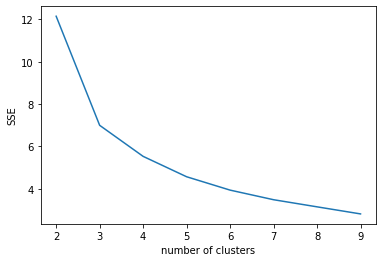

In [53]:
sse={}
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(iris2)
    iris["clusters"]=kmeans.labels_
    sse[k]=kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#inertia-Sum of squared distances of samples to their closest cluster center.
 |  